In [1]:

import tkinter as tk
from tkinter import filedialog
import numpy as np
import matplotlib.pyplot as plt
import os
from brukeropusreader import read_file
from scipy.signal import savgol_filter


In [2]:
def open_file_and_plot():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

In [3]:
 file_path = filedialog.askopenfilename()

2024-03-05 17:53:52.794 python[12629:511068] +[CATransaction synchronize] called within transaction


In [4]:
if file_path:
        # Reading the OPUS file
        opus_data = read_file(file_path)

In [5]:
 file_name = os.path.basename(file_path)

In [6]:
absorbance = opus_data['AB']

In [7]:

start_wn = opus_data['AB Data Parameter']['FXV']
end_wn = opus_data['AB Data Parameter']['LXV']
num_points = opus_data['AB Data Parameter']['NPT']

In [8]:
num_points = len(absorbance)

In [9]:
wavenumbers = np.linspace(start_wn, end_wn, num_points)

In [10]:
assert len(wavenumbers) == len(absorbance), "Wavenumbers and absorbance arrays must be the same length."

In [13]:
def calculate_second_derivative(absorbance, wavenumbers):
    # Berechnung der zweiten Ableitung
    second_derivative = np.gradient(np.gradient(absorbance)) / (wavenumbers[1] - wavenumbers[0])**2
    return second_derivative

In [15]:
second_derivative = calculate_second_derivative(absorbance, wavenumbers)
baseline_corrected = absorbance - second_derivative


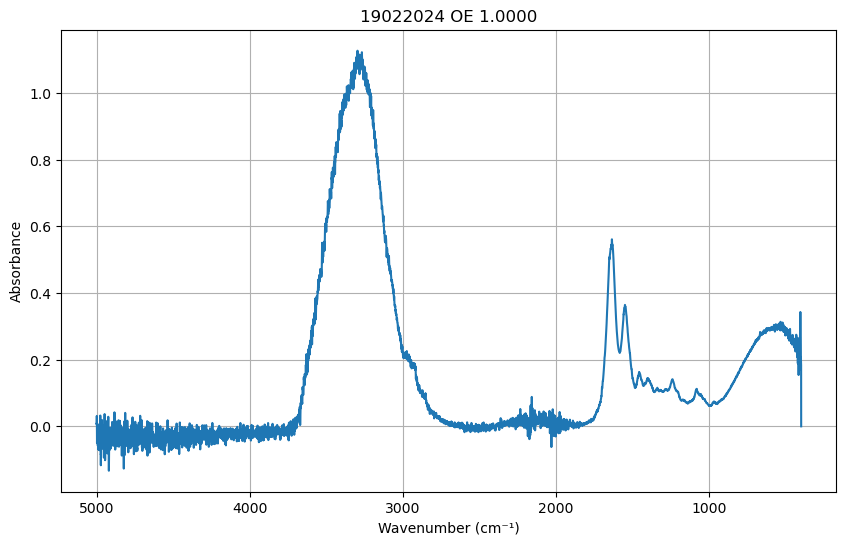

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(wavenumbers, absorbance)
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title(file_name)  # Using the file name as the title
plt.grid(True)
plt.gca().invert_xaxis()  # Inverting the x-axis as wavenumbers typically decrease
plt.show()
open_file_and_plot()